Importing Libraries

In [9]:
!pip install pandas
!pip install numpy matplotlib seaborn
!pip install scikit-learn
!pip install plotly
!pip install nbformat --upgrade


In [10]:
import random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px

Data Generation Based on given Code

In [11]:
id_1 = 7721 #change to first student id
id_2 = 7818 #change to second student id
id_3 = 0000 #change to third student id "leave 0000 if team of 2"
random_seed = id_1+id_2+id_3
random.seed(random_seed)
data_path="Data.csv"#replace with data path
output_path="MyData.csv"#replace with output data path

all_data=pd.read_csv(data_path) 
all_columns = all_data.columns.tolist()

target_column = 'smoking'  

all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)

print(selected_columns) #MUST BE PRINTED
selected_columns = np.append(selected_columns, target_column)
sample_df = all_data[selected_columns].copy()
sample_df.to_csv(output_path)   #From HERE YOU CAN SPLIT FOR TRAIN ,VALID AND TEST

['hearing(left)', 'Cholesterol', 'ALT', 'eyesight(left)', 'waist(cm)', 'hearing(right)', 'dental caries', 'hemoglobin', 'weight(kg)', 'serum creatinine']


Load Data

In [12]:
# Load the dataset
data = pd.read_csv("MyData.csv")

# Drop the unnamed first column
data = data.drop(data.columns[0], axis=1)

# Save the updated dataset back to csv
data.to_csv("MyData.csv", index=False)

# Display the first few rows
print("First few rows of the dataset:")
display(data.head())

# Overview of the dataset
print("\nDataset Information:")
data.info()

print("\nStatistical Summary:")
display(data.describe())



First few rows of the dataset:


,hearing(left),Cholesterol,ALT,eyesight(left),waist(cm),hearing(right),dental caries,hemoglobin,weight(kg),serum creatinine,smoking
0,1,172,25,0.5,81.0,1,0,16.5,60,1.0,1
1,2,194,23,0.6,89.0,2,1,16.2,65,1.1,0
2,1,178,31,0.4,81.0,1,0,17.4,75,0.8,1
3,1,180,27,1.5,105.0,1,1,15.9,95,1.0,0
4,1,155,13,1.5,80.5,1,0,15.4,60,0.8,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hearing(left)     159256 non-null  int64  
 1   Cholesterol       159256 non-null  int64  
 2   ALT               159256 non-null  int64  
 3   eyesight(left)    159256 non-null  float64
 4   waist(cm)         159256 non-null  float64
 5   hearing(right)    159256 non-null  int64  
 6   dental caries     159256 non-null  int64  
 7   hemoglobin        159256 non-null  float64
 8   weight(kg)        159256 non-null  int64  
 9   serum creatinine  159256 non-null  float64
 10  smoking           159256 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 13.4 MB

Statistical Summary:


,hearing(left),Cholesterol,ALT,eyesight(left),waist(cm),hearing(right),dental caries,hemoglobin,weight(kg),serum creatinine,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,1.023974,195.796165,26.550296,1.005798,83.001990,1.023421,0.197996,14.796965,67.143662,0.892764,0.437365
std,0.152969,28.396959,17.753070,0.402113,8.957937,0.151238,0.398490,1.431213,12.586198,0.179346,0.496063
min,1.000000,77.000000,1.000000,0.100000,51.000000,1.000000,0.000000,4.900000,30.000000,0.100000,0.000000
25%,1.000000,175.000000,16.000000,0.800000,77.000000,1.000000,0.000000,13.800000,60.000000,0.800000,0.000000
50%,1.000000,196.000000,22.000000,1.000000,83.000000,1.000000,0.000000,15.000000,65.000000,0.900000,0.000000
75%,1.000000,217.000000,32.000000,1.200000,89.000000,1.000000,0.000000,15.800000,75.000000,1.000000,1.000000
max,2.000000,393.000000,2914.000000,9.900000,127.000000,2.000000,1.000000,21.000000,130.000000,9.900000,1.000000


Data Handling

In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

#Handle missing values:
data.fillna(data.median(), inplace=True)

#remove outliers using IQR!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
df = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

#scaling (Normalization)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


Missing Values in Each Column:
Series([], dtype: int64)


Data Analysis: Univariate


Column: hearing(left)
Mean: 1.02
Median: 1.00
Standard Deviation: 0.15

Column: Cholesterol
Mean: 195.80
Median: 196.00
Standard Deviation: 28.40

Column: ALT
Mean: 26.55
Median: 22.00
Standard Deviation: 17.75

Column: eyesight(left)
Mean: 1.01
Median: 1.00
Standard Deviation: 0.40

Column: waist(cm)
Mean: 83.00
Median: 83.00
Standard Deviation: 8.96

Column: hearing(right)
Mean: 1.02
Median: 1.00
Standard Deviation: 0.15

Column: dental caries
Mean: 0.20
Median: 0.00
Standard Deviation: 0.40

Column: hemoglobin
Mean: 14.80
Median: 15.00
Standard Deviation: 1.43

Column: weight(kg)
Mean: 67.14
Median: 65.00
Standard Deviation: 12.59

Column: serum creatinine
Mean: 0.89
Median: 0.90
Standard Deviation: 0.18

Frequency Distribution for hearing(left):
hearing(left)
1    155438
2      3818
Name: count, dtype: int64

Frequency Distribution for Cholesterol:
Cholesterol
197    2238
198    2232
216    2203
199    2194
192    2149
       ... 
344       1
320       1
393       1
98        1
96

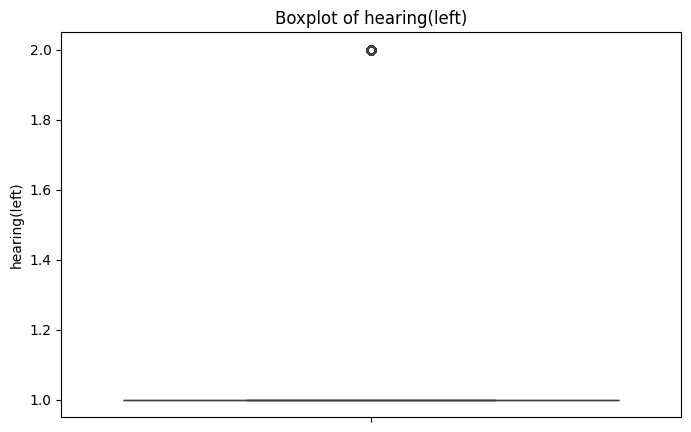

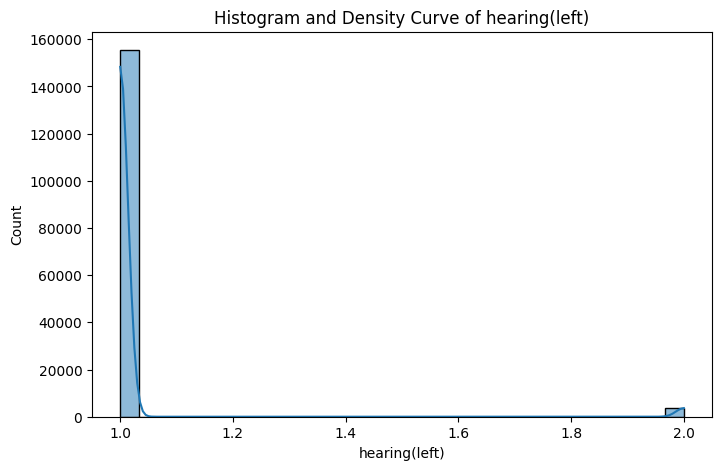

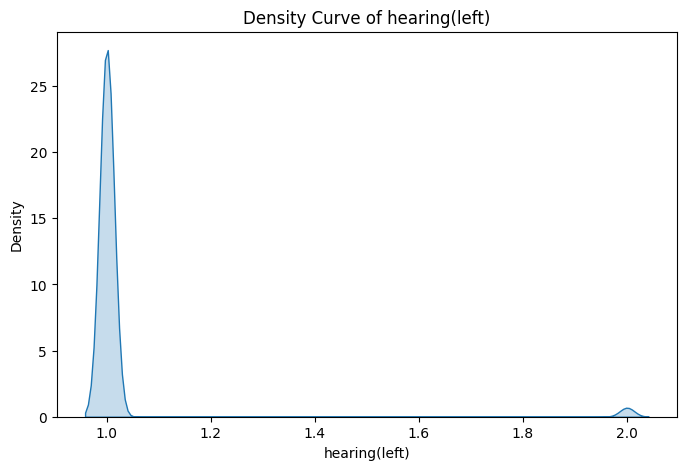

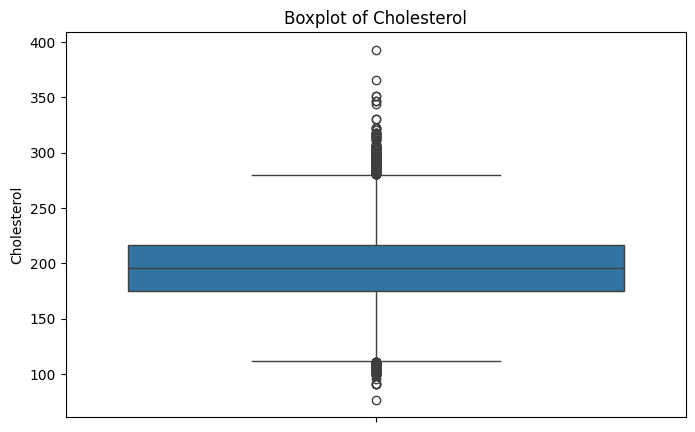

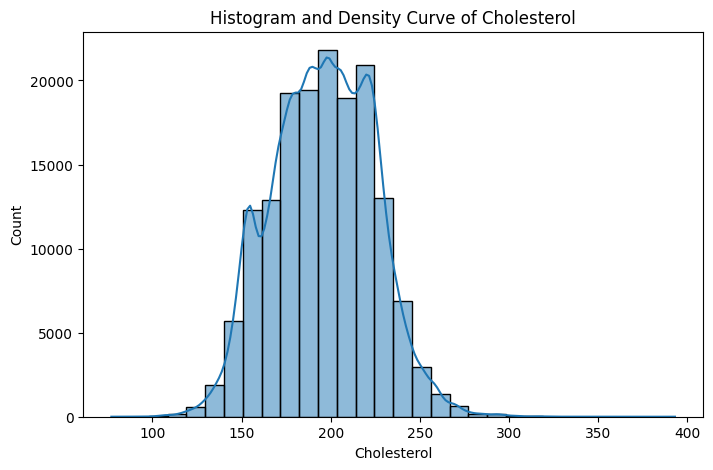

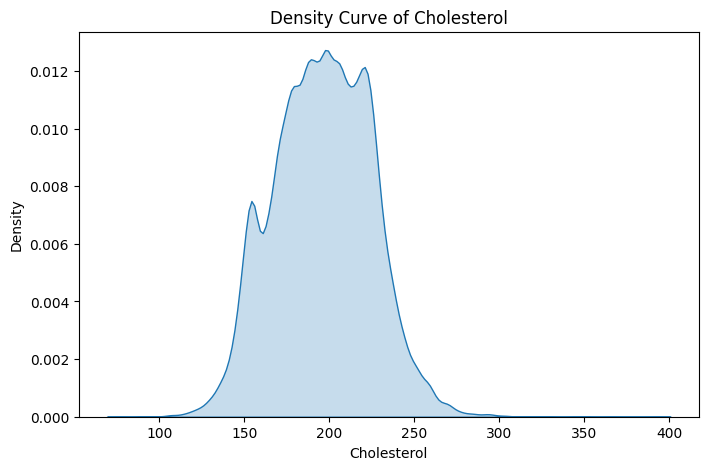

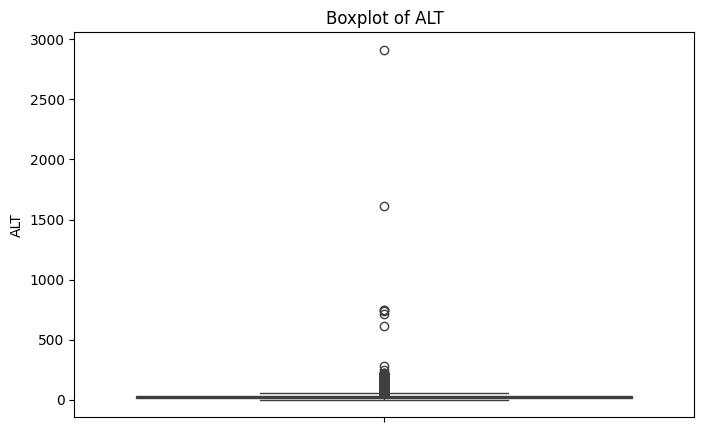

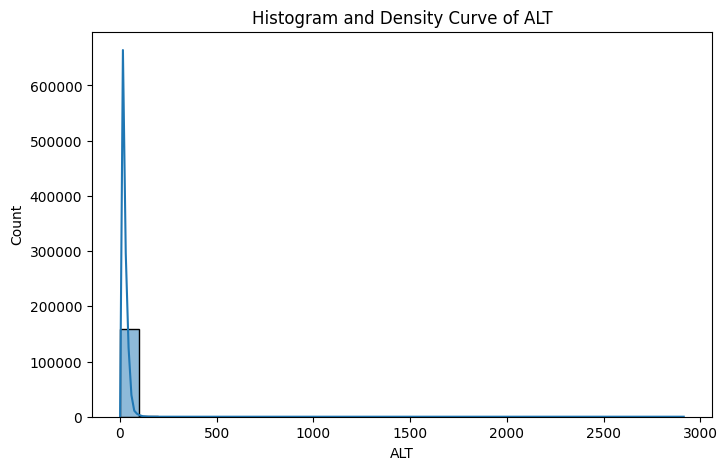

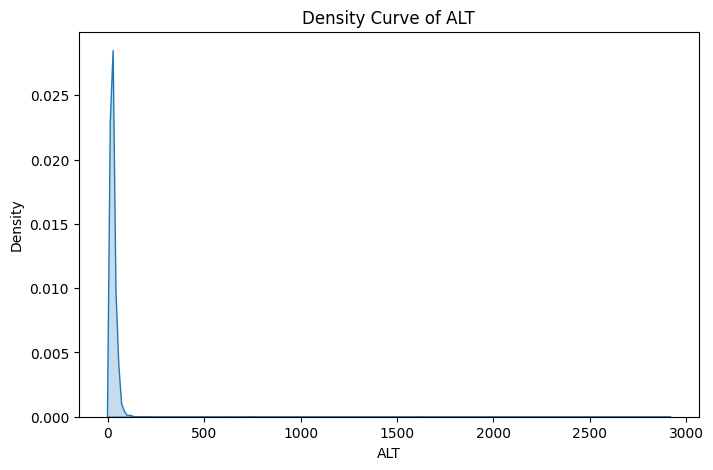

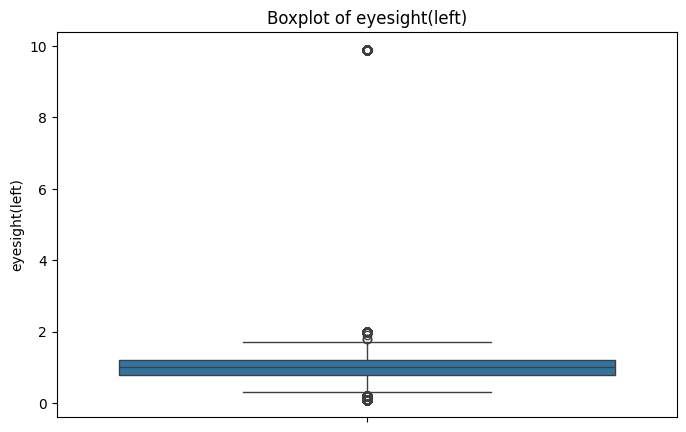

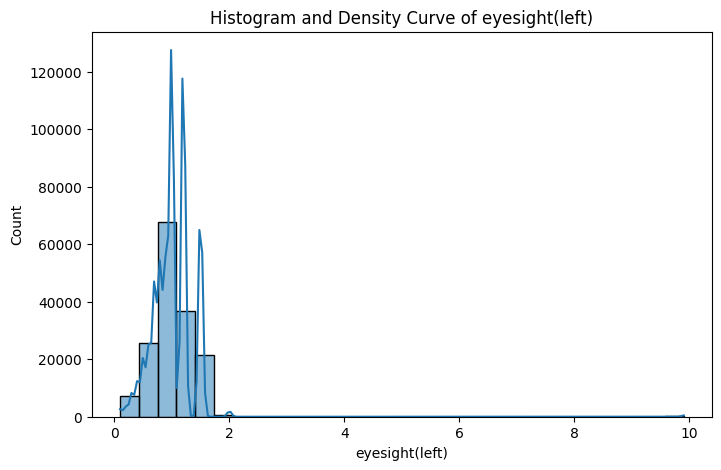

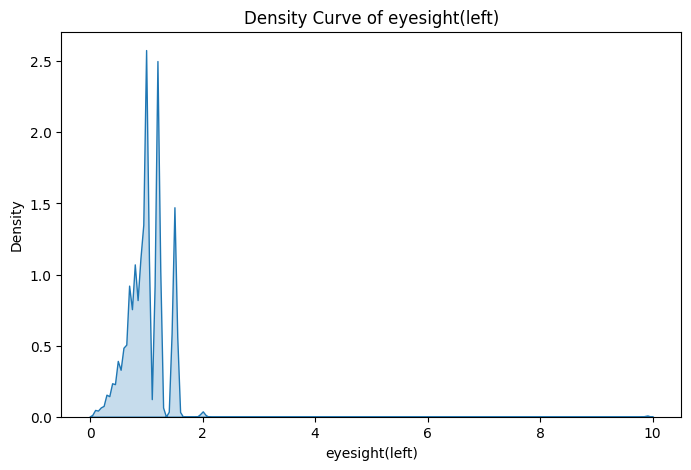

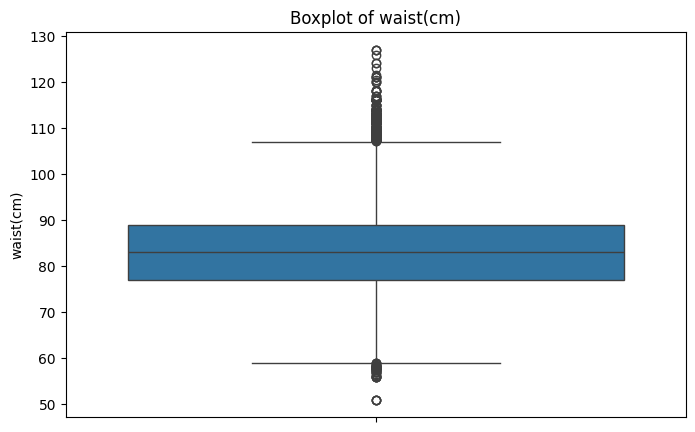

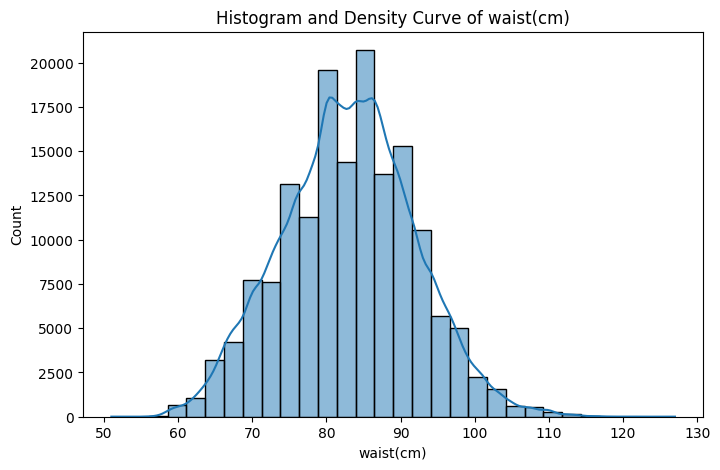

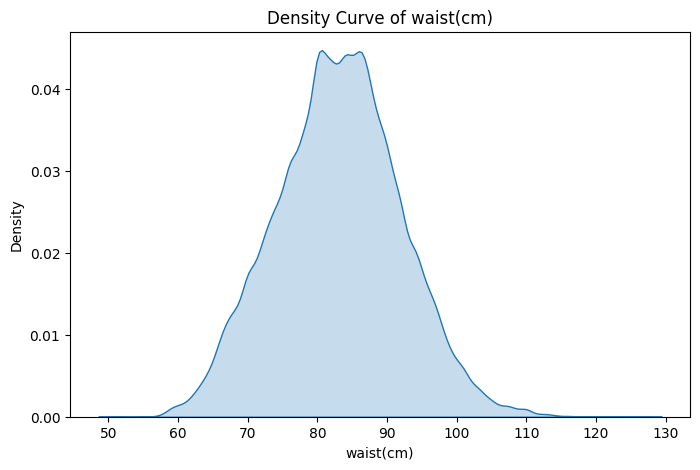

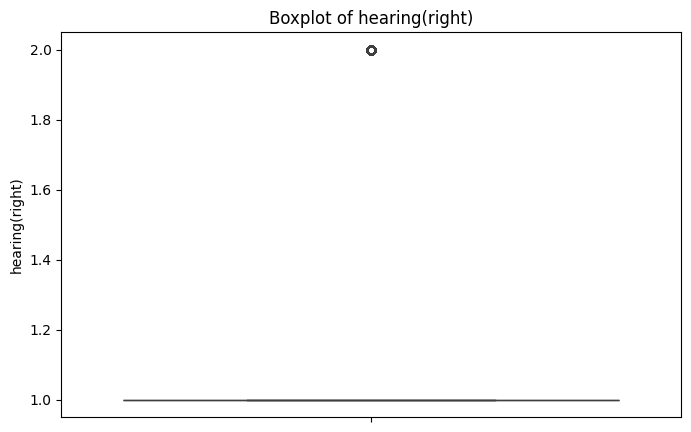

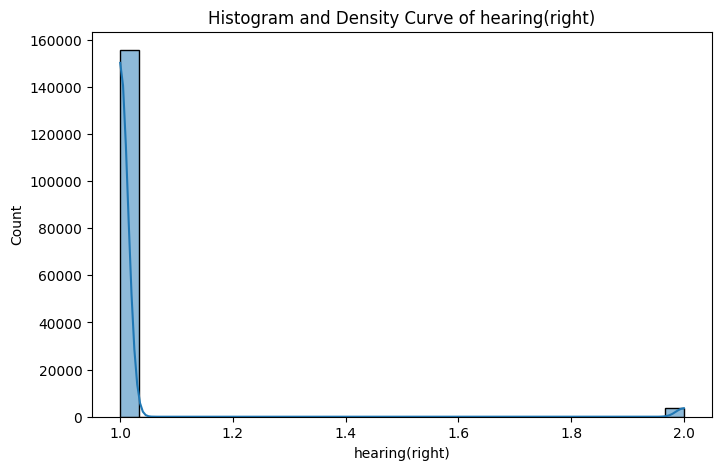

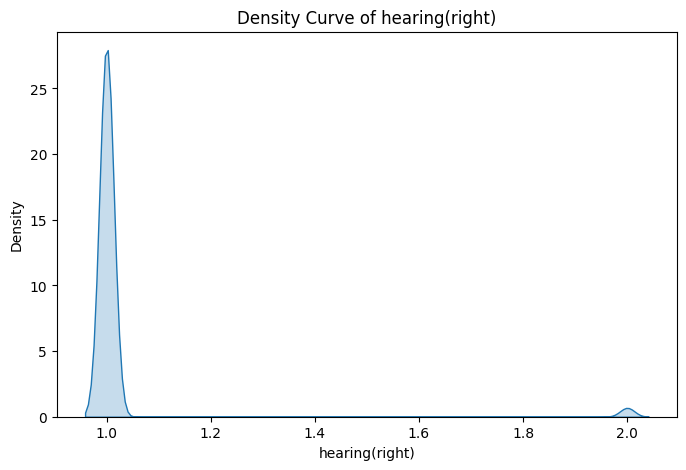

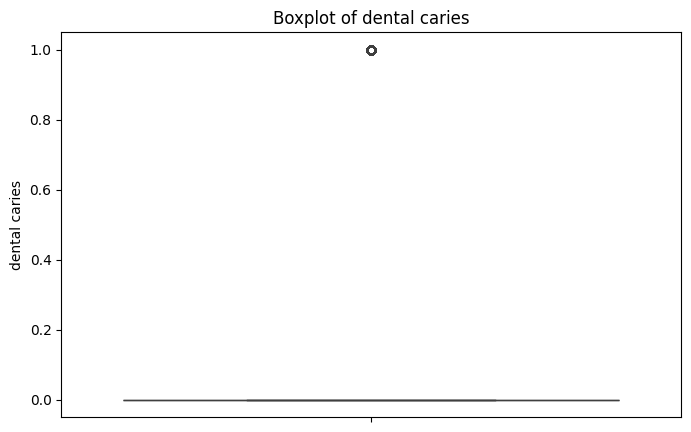

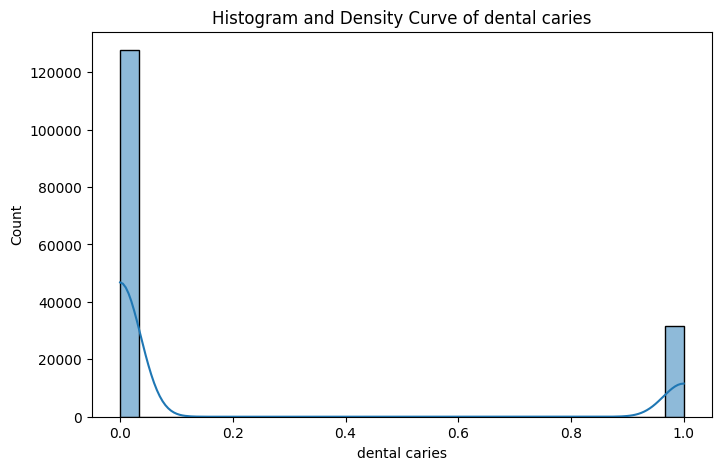

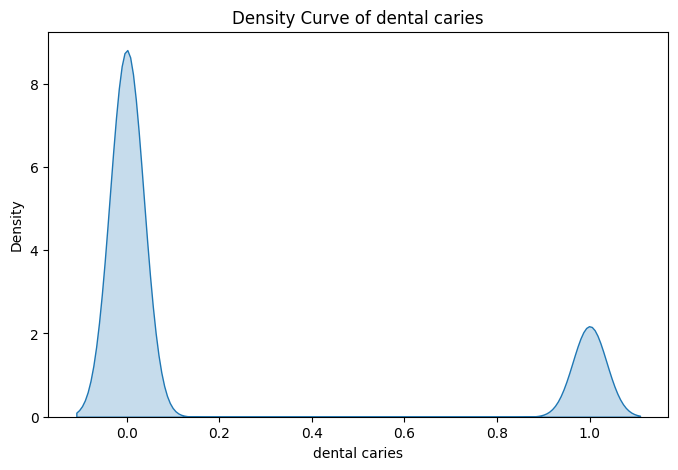

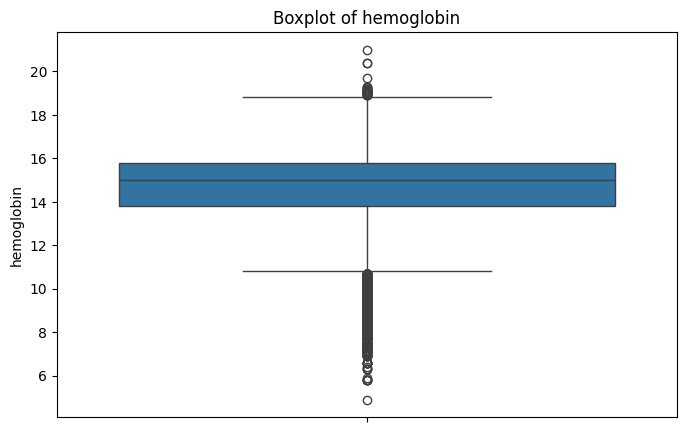

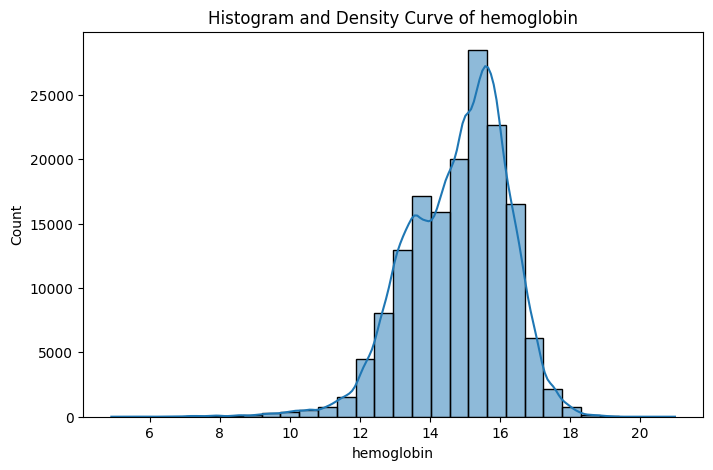

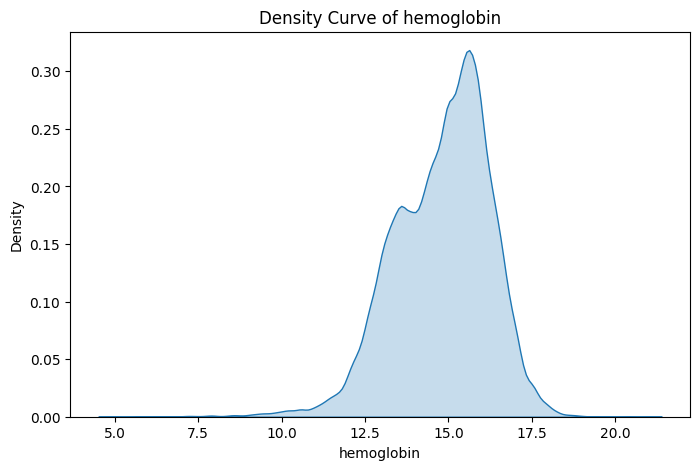

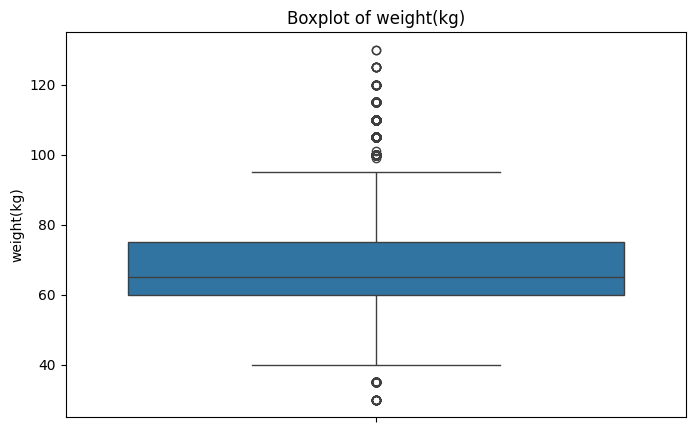

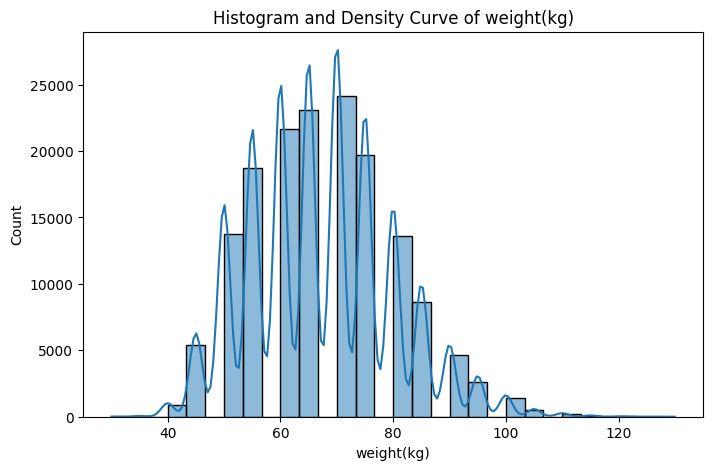

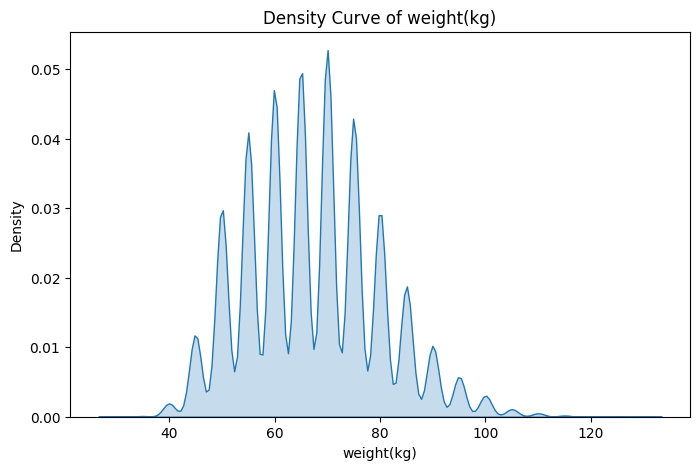

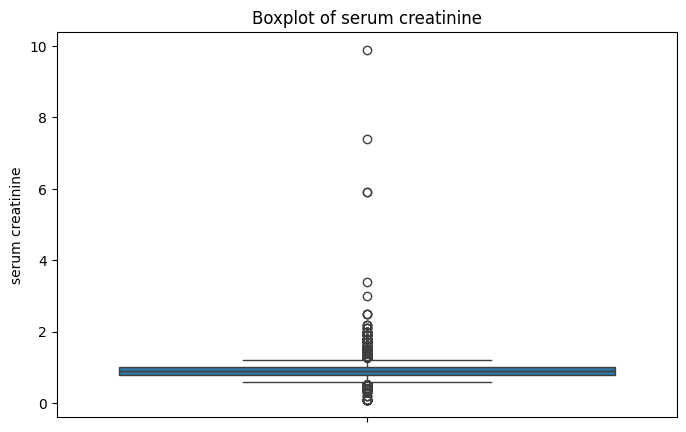

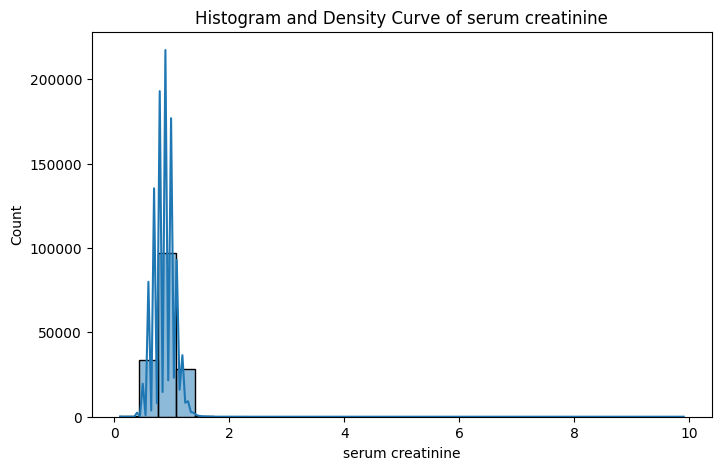

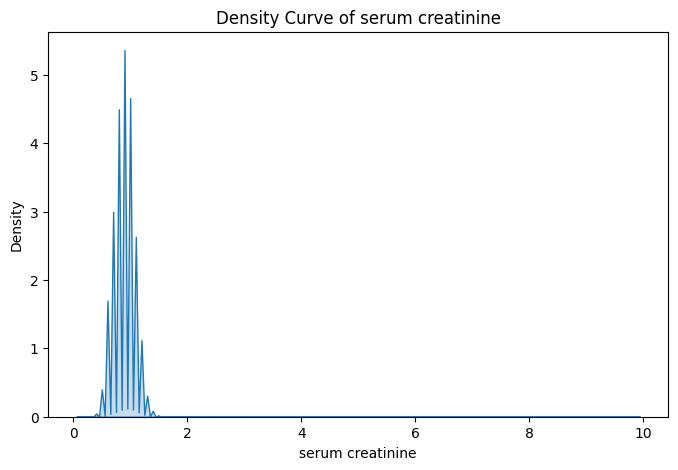

In [ ]:
# 1. Calculate measures of central tendency (mean, median) and dispersion (standard deviation)
for column in data.columns:
    if column != 'smoking':  # Skip the label column for now
        print(f"\nColumn: {column}")
        print(f"Mean: {data[column].mean():.2f}")
        print(f"Median: {data[column].median():.2f}")
        print(f"Standard Deviation: {data[column].std():.2f}")

# 2. Create frequency distributions
for column in data.columns:
    if column != 'smoking':  # Skip the label column for now
        print(f"\nFrequency Distribution for {column}:")
        print(data[column].value_counts())

# 3. Visualization
for column in data.columns:
    if column != 'smoking':  # Skip the label column for now
        # Boxplot
        plt.figure(figsize=(8, 5))
        sns.boxplot(data[column])
        plt.title(f"Boxplot of {column}")
        plt.show()
        
        # Histogram
        plt.figure(figsize=(8, 5))
        sns.histplot(data[column], kde=True, bins=30)
        plt.title(f"Histogram and Density Curve of {column}")
        plt.show()

        # Density plot
        plt.figure(figsize=(8, 5))
        sns.kdeplot(data[column], fill=True)
        plt.title(f"Density Curve of {column}")
        plt.show()


Data Analysis: Bivariate

Data Analysis: Multivariate